<a href="https://colab.research.google.com/github/nagae/ICL_B_2021/blob/main/global_total_case_top.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 感染者の多い国の感染者数の変化をプロット
世界編のサンプルです． 累積感染者の多い国について，感染者数の変化を片対数グラフで表示します．
複数の国のデータを重ねてプロットする方法と， subplot を使ってタイル状に配置する方法を両方示しています．

In [7]:
# 必要なモジュールのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates as mdates
import datetime
# CSVをデータフレームに読み込む（ちょっと重い）
global_df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
# 年-月-日の文字列で記載されている年月日を datetime 型に変更
global_df["date"]=pd.to_datetime(global_df["date"], format="%Y-%m-%d")
# 県別でも扱ったマルチインデックスとして整形
global_df = global_df.set_index(["location", "date"])
# 国名でない地域名
area_list = ['World', 'Asia', 'Europe', 'North America', 'European Union', 'South America', 'Africa']
global_df = global_df.drop(index=area_list) # 地域名を取り除く(取り除きたくない場合はこの行をコメントアウト)
global_df # global_df の概観を表示

iso_code  ... human_development_index
location    date                 ...                        
Afghanistan 2020-02-24      AFG  ...                   0.511
            2020-02-25      AFG  ...                   0.511
            2020-02-26      AFG  ...                   0.511
            2020-02-27      AFG  ...                   0.511
            2020-02-28      AFG  ...                   0.511
...                         ...  ...                     ...
Zimbabwe    2021-05-18      ZWE  ...                   0.571
            2021-05-19      ZWE  ...                   0.571
            2021-05-20      ZWE  ...                   0.571
            2021-05-21      ZWE  ...                   0.571
            2021-05-22      ZWE  ...                   0.571

[87178 rows x 57 columns]

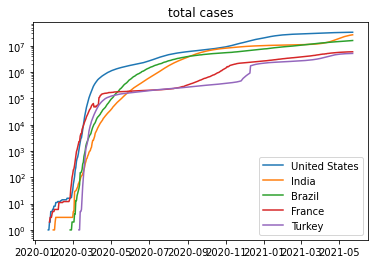

In [21]:
rank = 5 # 取得範囲を上位5カ国とする
# 累積感染者数の多い国を取得
country_set = global_df.groupby("location")["total_cases"].last().sort_values(ascending=False).head(rank).index
# 一枚のグラフに重ねてプロットする場合
for country in country_set:
    plt.plot(global_df.loc[country]["total_cases"], label=country) # 累積感染者数をプロット
    plt.yscale('log') # y軸を対数に
plt.title("total cases") # タイトルを設定
plt.legend() # 凡例を表示


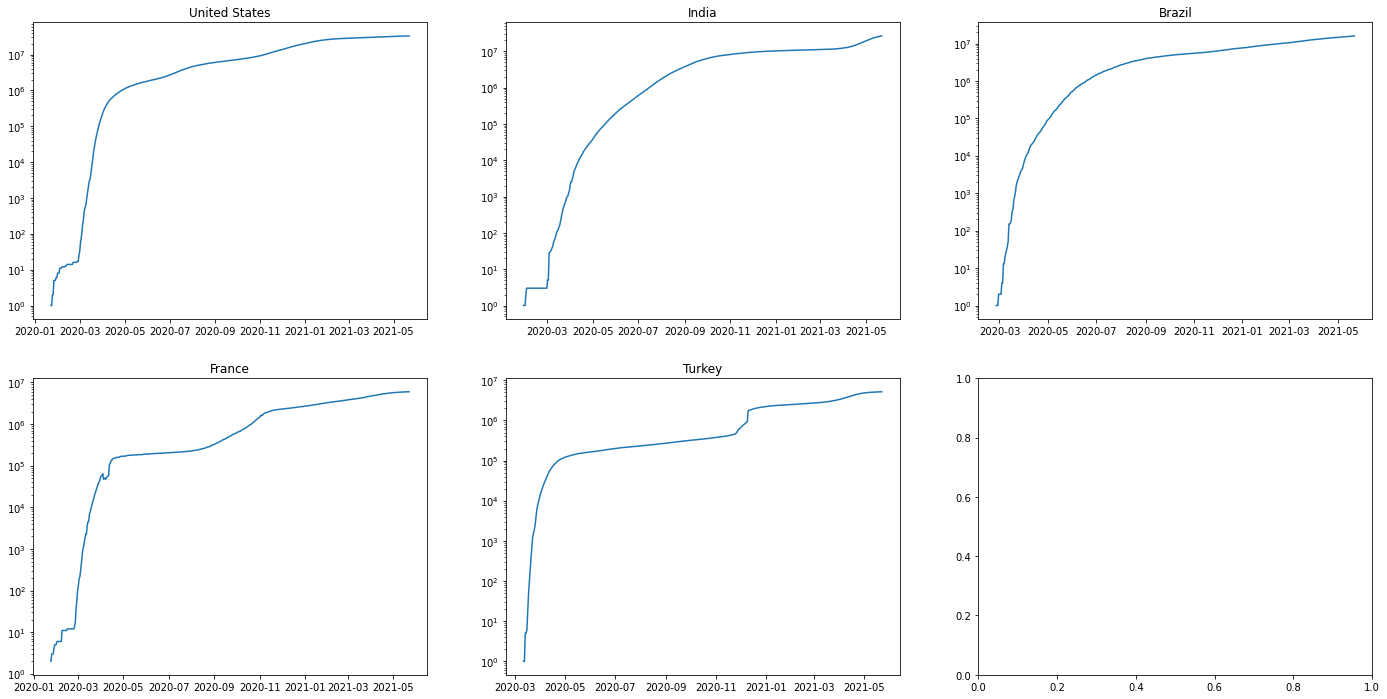

In [23]:
# 国別の図をタイル状に配置する場合
cols = 3 # 列数
rows = np.ceil(len(country_set) / cols).astype(int) # 行数
fig, ax = plt.subplots(rows, cols, figsize=(8*cols, 6*rows)) # 空タイルを配置
# 上位5カ国について累積感染者数の変化をプロット
for cid, country in enumerate(country_set):
    r, c = cid // cols, cid % cols # 配置するタイルの位置を指定
    ax[r][c].plot(global_df.loc[country]["total_cases"])  # 累積感染者数をプロット
    ax[r][c].set_yscale('log') # y軸を対数に
    ax[r][c].set_title(country) # タイトルを設定